<a href="https://colab.research.google.com/github/amalvarezme/AnaliticaDatos/blob/master/Talleres%26Parciales/Parcial1_2023_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 1 - 2023 - 1
# Señales y Sistemas


1. Determine si la siguiente señal es periódica, aperiódica o cuasi-periódica. En caso de ser periódica o cuasi-periódica determine el valor del período. (Valor: 2.5 puntos)

$$x(t) = 7\sin(4t - \pi/2) - 2 \cos(5 t) + 2\cos(10 t)$$

**Solución**: 

Se analiza la periodicidad de la señal a partir de las frecuencias angulares y el período fundamental de cada señal:

$$\boxed{\omega_1 = 4; \quad \omega_2 = 5; \quad \omega_3 = 10 \quad [rad/s]}.$$

$$\omega_1 = \frac{2\pi}{T_1}\to T_1 = \frac{2\pi}{\omega_1} = \frac{2\pi}{4}= \frac{\pi}{2} \quad [s]$$

$$\omega_2 = \frac{2\pi}{T_2}\to T_2 = \frac{2\pi}{\omega_2} = \frac{2\pi}{5} \quad [s]$$

$$\omega_3 = \frac{2\pi}{T_3}\to T_3 = \frac{2\pi}{\omega_3} = \frac{2\pi}{10} = \frac{\pi}{5} \quad [s]$$

$$\boxed{T_1 = \frac{\pi}{2}; \quad T_2 = \frac{2\pi}{5}; \quad T_3 = \frac{\pi}{5} \quad [s]}.$$

Se verifica que las relaciones entre frecuencias pertenecen a los números racionales $\mathbb{Q}:$

$$\boxed{\frac{\omega_1}{\omega_2} = \frac{4}{5}; \quad \frac{\omega_1}{\omega_3} = \frac{4}{10} = \frac{2}{5}; \quad \frac{\omega_2}{\omega_3} = \frac{5}{10} = \frac{1}{2}; \quad \in \mathbb{Q}}.$$

Por lo tanto, **$x(t)$ es una señal causi-periódica**. 

Ahora, el período $T\in\mathbb{R}^+$ de la señal se encuentra a partir de las siguientes relaciones:

$$\omega_1 T = 2\pi k; \quad \omega_2 T = 2\pi l; \quad \omega_3 T = 2\pi r;$$

donde $k,l,r \in \mathbb{Z}.$ Además:

$$\frac{2\pi}{T_1} T = 2\pi k; \quad \frac{2\pi}{T_2} T = 2\pi l; \quad \frac{2\pi}{T_3} T = 2\pi r$$

$$\boxed{T = T_1 k = T_2 l = T_3 r}.$$

En ese sentido:

$$T = \frac{\pi}{2}k = \frac{2\pi}{5}l = \frac{\pi}{5}r,$$

Para facilidad de análisis, se divide toda la expresión por $\pi$ y se multiplica por 10:


$$\frac{10}{\pi}T = 5 k = 4 l = 2 r.$$

Se determina el mínimo común múltiplo (MCM) entre $[5,4,2]$:

 $$MCM([5,4,2]) = 20.$$

 Por consiguiente: 

$$\frac{10}{\pi}T = 5 k = 4 l = 2 r = 20$$

$$\frac{10}{\pi}T = 5 (4) = 4 (5) = 2 (10) = 20$$

$$T = \frac{20}{10}\pi$$

$$\boxed{T = 2\pi}$$




In [1]:
#Se simula la señal cuasi-periódica
%matplotlib inline
import sympy as sym
sym.init_printing() #se inicializa para mostrar en pantalla

t = sym.symbols('t', real=True)#se declara la variable simbólica t
x = 7*sym.sin(4*t - 0.5*sym.pi) - 2*sym.cos(5*t) + 2*sym.cos(10*t)#señal a simular
x

7⋅sin(4⋅t - 0.5⋅π) - 2⋅cos(5⋅t) + 2⋅cos(10⋅t)

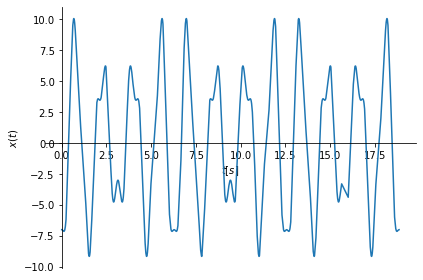

In [2]:
#gráfica desde 0 hasta 3T
T = 2*sym.pi #periodo de la señal cuasi-perdiódica
sym.plot(x,(t,0,3*T),xlabel=r'$t [s]$',ylabel=r'$x(t)$')

  2. Sean $\mathsf{H}\{\cdot\}$ y $\mathsf{G}\{\cdot\}$ dos sistemas lineales e invariantes con el tiempo. La respuesta al escalón de $\mathsf{H}\{\cdot\}$ se define como $h_{u}(t) = Ae^{-Bt};$ y la respuesta impulso de $\mathsf{G}\{\cdot\}$ se define como  $g_{\delta}(t) = (1 - Ce^{-Dt})$, \forall $t \geq 0$. Encuentre la salida $y(t) =\mathsf{H}\{\mathsf{G}\{x(t)\}\}$ ante la entrada $x(t) = E \cdot {\rm{rect}}_{T_R}(t-t_o),$ con $A,B,C,D,E,T_R,t_o \in \mathbb{R}^+$ y $t_o\geq 0.5T_R$. (Valor: 2.5 puntos)

**Nota**: tenga en cuenta que el operador de convolución es asociativo: 

$$x_1(t)*x_2(t)*x_3(t) = \left(x_1(t)*x_2(t)\right)*x_3(t)=x_1(t)*\left(x_2(t)*x_3(t)\right)$$



**Solución:**

Primero, estimamos la respuesta impulso del sistema $\mathsf{H}\{\cdot\}$ a partir de su respuesta escalón, como sigue:

$$h_{\delta}(t) = \frac{d}{dt}h_{u}(t)=  \frac{d}{dt}\left\{Ae^{-Bt}\right\}$$

entonces:

$$\boxed{h_{\delta}(t) = -ABe^{-Bt}}$$

Después, para encontrar $\mathsf{G}\{x(t)\}$ $\forall t\geq 0,$ tenemos que:

$$y_g(t) =  \mathsf{G}\{x(t)\} = g_\delta(t)*x(t) = x(t)* g_\delta(t) = \int_0^t x(\tau)g_\delta(t-\tau)d\tau$$

$$y_g(t) = \int_0^t x(\tau)g_\delta(t-\tau)d\tau = \int_0^t E\cdot {\rm{rect}}_{T_R}(\tau-t_o)\left(1 - Ce^{-D(t-\tau)}\right)d\tau$$

$$y_g(t) =\int_0^t E\cdot {\rm{rect}}_{T_R}(\tau-t_o)d\tau - \int_0^t EC\cdot {\rm{rect}}_{T_R}(\tau-t_o)e^{-D(t-\tau)}d\tau$$

$$y_g(t) =E\int_{t_o-0.5T_R}^{t_o+0.5T_R}  d\tau - EC \cdot e^{-Dt}\int_{t_o-0.5T_R}^{t_o+0.5T_R} e^{D\tau}d\tau$$

$$y_g(t) =E\tau \Big|_{t_o-0.5T_R}^{t_o+0.5T_R}  - \frac{EC}{D} \cdot e^{-Dt} e^{D\tau}\Big|_{t_o-0.5T_R}^{t_o+0.5T_R}$$

$$y_g(t) = E\left(t_o+0.5T_R - t_o+0.5T_R\right) - \frac{EC}{D} \cdot e^{-Dt}\left(e^{D(t_o+0.5T_R)}-e^{D(t_o-0.5T_R)}\right)$$

$$\boxed{y_g(t) = E \cdot T_R - \frac{EC}{D}\left(e^{D(t_o+0.5T_R)}-e^{D(t_o-0.5T_R)}\right)e^{-Dt}}$$

Finalmente: 

$$y(t) =  \mathsf{H}\{y_g(t)\} = y_g(t) * h_\delta(t) = \int_0^t y_g(\tau)h_\delta(t-\tau)d\tau$$

$$y(t) =  \int_0^t \left(E \cdot T_R - \frac{EC}{D}\left(e^{D(t_o+0.5T_R)}-e^{D(t_o-0.5T_R)}\right)e^{-D\tau}\right)\left(-ABe^{-B(t-\tau)}\right)d\tau$$

$$y(t) =  \int_0^t \left(-ABET_R e^{-B(t-\tau)}\right)d\tau + \int_0^t \frac{ABEC}{D}\left(e^{D(t_o+0.5T_R)}-e^{D(t_o-0.5T_R)}\right)e^{-D\tau}e^{-B(t-\tau)}d\tau$$


$$y(t) = -ABET_R e^{-Bt} \int_0^t e^{B\tau} d\tau + \frac{ABEC}{D}\left(e^{D(t_o+0.5T_R)}-e^{D(t_o-0.5T_R)}\right)e^{-Bt} \int_0^t e^{\tau(B-D)}d\tau$$


$$y(t) = -AET_R e^{-Bt} e^{B\tau}\Big|_{0}^t + \frac{ABEC}{D(B-D)}\left(e^{D(t_o+0.5T_R)}-e^{D(t_o-0.5T_R)}\right)e^{-Bt} e^{(B-D)\tau}\Big|_{0}^t$$

$$\boxed{y(t) = -AET_R e^{-Bt}\left(e^{Bt}-1\right) + \frac{ABEC}{D(B-D)}\left(e^{D(t_o+0.5T_R)}-e^{D(t_o-0.5T_R)}\right)e^{-Bt}\left(e^{(B-D)t}-1\right)}$$

3. Diseñe e implemente en simulación sobre Python (cuaderno de Collaboratory), el proceso de digitalización de la señal del punto 1, utilizando una tarjeta de adquisición de 3 bits con entrada análoga de 0 a 5 v. (Valor: bonificación de 0.5 puntos - fecha máxima de envio 23:59 del 21 de marzo de 2023 al correo amalvarezme@unal.edu.co).

**Solución**:

Se diseña el proceso de digitalización, que incluye:

- Cero y pendiente
- Discretización 
- Cuantización

In [3]:
#importar librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

#periodos y frecuencias de las señales
T1 = np.pi/2 
T2 = 2*np.pi/5
T3 = np.pi/5 
T = 2*np.pi #periodo señal cuasiperiódica

F1 = 1/T1
F2 = 1/T2
F3 = 1/T3

#definir frecuencia de muestreo Fs >= 2 Fmax
Fs = 10*max(F1,F2,F3)
tv = np.arange(0,2*T,1/Fs) #vector de tiempo según Fs diseñada

#señal punto 1
x = 7*np.sin(4*tv - np.pi/2) - 2*np.cos(5*tv) + 2*np.cos(10*tv)


In [4]:
#función cero y pendiente
def my_ceropend(x,xhmax=10,xhmin=0):
  #cálculo de pendiente y cero
  m = (xhmax-xhmin)/(x.max()-x.min())#cálculo pendiente
  b = xhmin - m*x.min() #cálculo cero
  xh = m*x+b #señal con cero y pendiente
  return xh

In [5]:
#señal cero y pendiente a 0 - 5 v
xhmax = 5
xhmin = 0
xh = my_ceropend(x,xhmax=xhmax,xhmin=xhmin).reshape(-1,1)

In [6]:
#cuantizar
nbits = 3 #número bits
Ne = 2**nbits #cantidad de estados
ve = np.linspace(xhmin,xhmax,Ne).reshape(-1,1)#vector de estados
#asegurar vector columna

xq = np.zeros(len(xh)) #señal cuantizada
for i in range(len(xh)): #recorrer señal cero y pendiente
    xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados

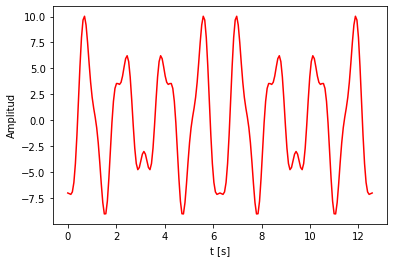

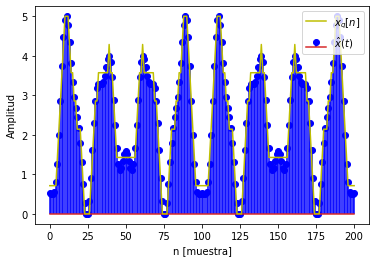

In [8]:
#gráficas de señales
plt.plot(tv,x,'r',label='$x(t)$')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.show()
plt.stem(xh,'b',label='$\hat{x}(t)$')
plt.plot(xq,'y',label='$x_{q}[n]$')
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()